In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [290]:
data = pd.read_csv('traffic.csv')
data

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [291]:
data.isnull().any()

DateTime    False
Junction    False
Vehicles    False
ID          False
dtype: bool

In [292]:
data.DateTime = pd.to_datetime(data.DateTime)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [293]:
from sklearn import preprocessing

data['year'] = data.DateTime.dt.year
data['month'] = data.DateTime.dt.month
data['date'] = data.DateTime.dt.day
data['hour'] = data.DateTime.dt.hour
data['day'] = data.DateTime.dt.strftime('%A')

label_encoder = preprocessing.LabelEncoder()
data['day_num'] = label_encoder.fit_transform(data['day'])

data

,DateTime,Junction,Vehicles,ID,year,month,date,hour,day,day_num
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,Sunday,3
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,Sunday,3
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,Sunday,3
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,Sunday,3
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,Sunday,3
...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017,6,30,19,Friday,0
48116,2017-06-30 20:00:00,4,30,20170630204,2017,6,30,20,Friday,0
48117,2017-06-30 21:00:00,4,16,20170630214,2017,6,30,21,Friday,0
48118,2017-06-30 22:00:00,4,22,20170630224,2017,6,30,22,Friday,0


C:\Users\NoYoN_CSE16\AppData\Local\Temp\ipykernel_16392\3931843622.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<Axes: >

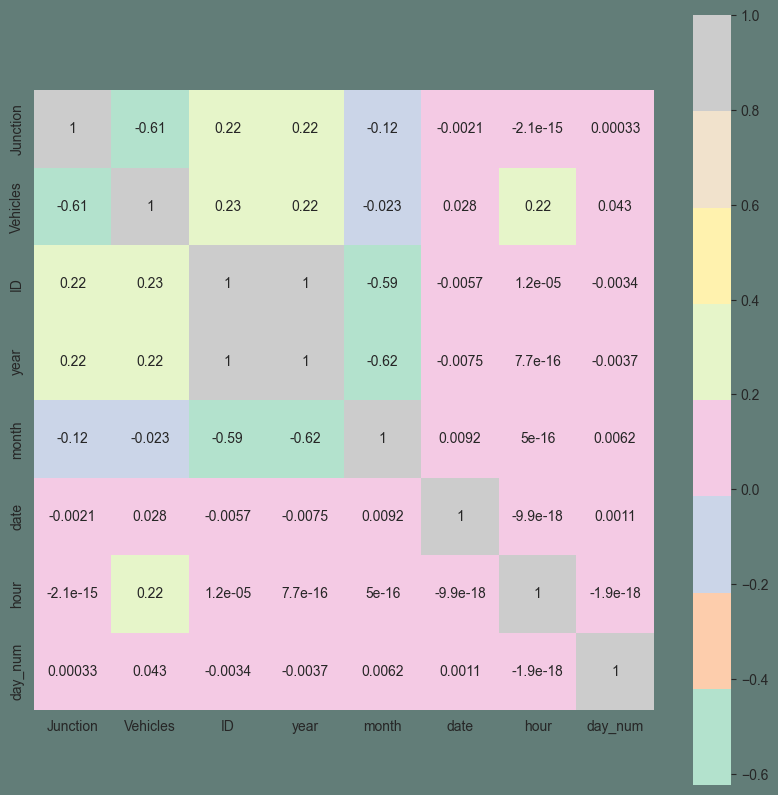

In [295]:
corrmat = data.corr()
plt.subplots(figsize=(10, 10), facecolor="#627D78")
sns.heatmap(corrmat, cmap="Pastel2", annot=True, square=True)

In [296]:
data

,DateTime,Junction,Vehicles,ID,year,month,date,hour,day,day_num
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,Sunday,3
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,Sunday,3
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,Sunday,3
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,Sunday,3
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,Sunday,3
...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017,6,30,19,Friday,0
48116,2017-06-30 20:00:00,4,30,20170630204,2017,6,30,20,Friday,0
48117,2017-06-30 21:00:00,4,16,20170630214,2017,6,30,21,Friday,0
48118,2017-06-30 22:00:00,4,22,20170630224,2017,6,30,22,Friday,0


In [297]:
y = data.Vehicles
x = data[['Junction', 'year', 'month', 'date', 'hour']]


In [298]:
import sklearn
from sklearn import model_selection

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=.20, random_state=5)

In [299]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

In [302]:
p = 0
sum = 0
actual = np.array(y_test)

while p < prediction.size:
    x = abs(prediction[p] - actual[p])
    sum += x
    p += 1

print("Error : "(sum / p))

93955.8619229568
9.762662294571571


In [306]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(x_train)
poly.fit(x_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [319]:
ypred = poly.fit_transform(x_test)
prediction = lin2.predict(ypred)
p=0
sum=0
while p < prediction.size:
    x = abs(prediction[p] - actual[p])
    sum += x
    p += 1

print("Error : ",(sum / p))

Error :  5.99171161202285
